
Data Science in Customer Marketing Segmantation

Case :

The Dqlab company is trying to get to know its customers better. The goal is for the company to create a more appropriate and efficient marketing strategy for each customer. We are given the task to be able to provide recommendations to solve these problems.
The right way is to group existing customers based on the similarity of the characters of these customers. To do this, we will use unsupervised machine learning techniques.
One of the techniques that can be used is the application of machine learning using the K-Prototypes algorithm.  K-Prototypes algorithm is a combination of K-Means and K-Modes that can be used to segment data.

The data has seven columns with the following explanation:
- Customer ID: Customer code with mixed text format CUST- followed by numbers
- Customer Name: Name of the customer with text format of course
- Gender: The gender of the customer, there are only two contents of the category data, namely Male and Female.
- Age: Age of the customer in numeric format
- Profession: Profession of the customer, also in text type category consisting of Self-employed, Student, Professional, Housewife, and Student.
- Resident Type: The type of residence of our customer, for this dataset there are only two categories: Cluster and Sector.
- Yearly Shopping Value: This is the total expenditure that has been spent by the customer.

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path  

In [ ]:
# Import dataset  
url = "https://storage.googleapis.com/dqlab-dataset/customer_segments.txt"
df = pd.read_csv(url, sep="\t")  
  
# Show the data 
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


After making the data call and looking at the data information you have, you finally know that:
- The data to be used consists of 50 rows and 7 columns
- There are no null values in the data
- Two columns have numeric data type and five have string data type

Data Exploration

Firstly, we need to look at the data distribution of numeric data. Here we will use a boxplot and also a histogram to see the data distribution. To create these graphs, we need to prepare which columns are numeric columns. Then use the seaborn library to plot each numeric column, namely 'Age' and 'ValueSpentAnnually'.

C:\Users\MyPC\AppData\Local\Temp\ipykernel_14280\2028879376.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
C:\Users\MyPC\AppData\Local\Temp\ipykernel_14280\2028879376.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or c

<Figure size 640x480 with 0 Axes>

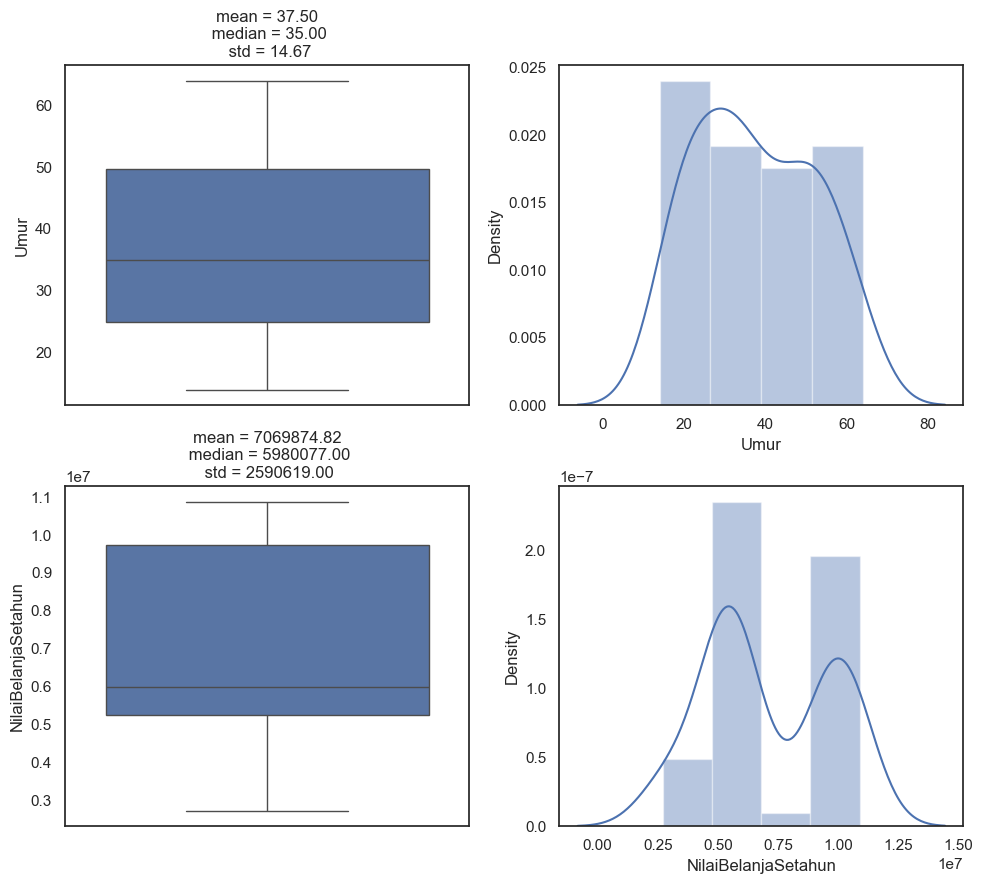

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()
  
# Function to create a plot
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Calls the function to create a Plot for numeric data
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik)

C:\Users\MyPC\AppData\Local\Temp\ipykernel_14280\1029072144.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kol, data = df, order=df[kol].value_counts().index, ax = axs[i], palette="pastel")
C:\Users\MyPC\AppData\Local\Temp\ipykernel_14280\1029072144.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kol, data = df, order=df[kol].value_counts().index, ax = axs[i], palette="pastel")
C:\Users\MyPC\AppData\Local\Temp\ipykernel_14280\1029072144.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kol, data = df, order=df[kol].

<Figure size 640x480 with 0 Axes>

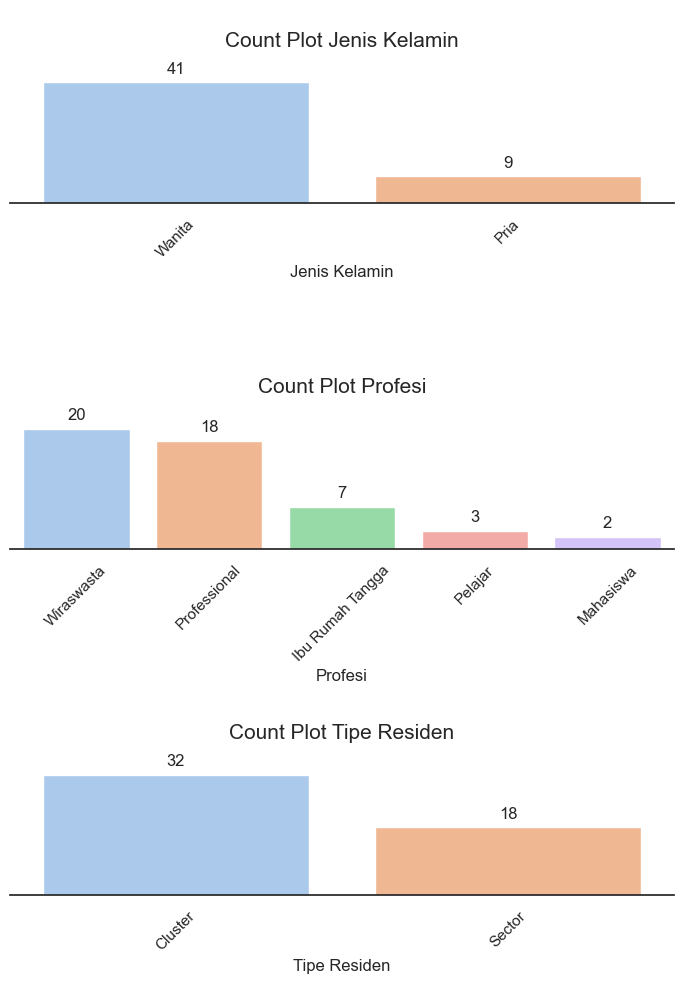

In [23]:
sns.set(style='white')
plt.clf()
  
# Setting up categorical columns
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Creating a canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Create a plot for each categorical column
for i, kol in enumerate(kolom_kategorikal):  
    # Creating a Plot
    sns.countplot(x=kol, data = df, order=df[kol].value_counts().index, ax = axs[i], palette="pastel")  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Give Annotate
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)
    plt.tight_layout()

# Show plot
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler  
  
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']  
  
# Statistics before Standardization
print('Statistics Before Standardization\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardization
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Creating a DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Display sample data contents and summary statistics  
print('Example of standardization result\n')  
print(df_std.head())  
  
print('Standardization result statistics\n')  
print(df_std.describe().round(0))

Statistics Before Standardization

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Example of standardization result

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Standardization result statistics

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


After standardization, each column has a mean of 0 and a standard deviation of 1, so no feature dominates simply because it has a larger scale.”

In [8]:
from sklearn.preprocessing import LabelEncoder  
  
# Categorical column name initiation
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
# Make a copy of the data frame
df_encode = df[kolom_kategorikal].copy()  
  
  
# Perform labelEncoder for all categorical columns
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])  
      
# Display the data
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [9]:

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']
df_std = StandardScaler().fit_transform(df[kolom_numerik])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)
 
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
df_encode = df[kolom_kategorikal].copy()
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Merging data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')  
print (df_model.head())


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


PART 2

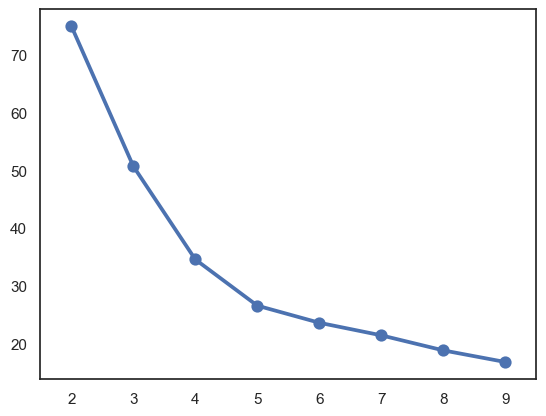

In [10]:
data = "https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv"
df_model = pd.read_csv(data)
# Iterate to Get the Cost value  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Vusualization Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()  


The Elbow Chart shows that the K-Prototypes model is most efficient when using 4 customer clusters.
After that, adding more clusters only makes the model more complex without significantly improving the results.

Next, you can create a model with the number of clusters that have been obtained in the previous stage, namely 5 and save the results as a pickle file.

In [24]:

# Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))


Cluster each customer in the dataset using the kproto model that has been created previously. Then combine the prediction results with the initial data (df) so that we get customer data along with the cluster name.

In [12]:
# Using the Model
# Define each customer segment
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('customer segments: {}\n'.format(clusters))    
    
# Combining initial data and customer segments
df_final = df.copy()    
df_final['cluster'] = clusters    
print(df_final.head())

customer segments: [8 3 5 5 6 2 8 5 2 2 5 5 8 8 1 2 2 5 6 3 6 5 2 6 1 5 6 0 5 0 4 7 4 1 0 6 2
 7 2 3 2 1 2 1 2 1 5 7 0 7]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        8  
1      Cluster              2722700        3  
2      Cluster              5286429        5  
3      Cluster              5204498        5  
4      Cluster             10615206        6  


Once you have combined the initial customer data and the clusters, you need to display and observe the results to help you name each cluster based on its characteristics.

In [13]:
# Display the Cluster of Each Customer
# Display customer data based on its cluster  
for i in range(0, 5):  
    print('\nCluster customers: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])



Cluster customers: 0

   Customer_ID   Nama Pelanggan Jenis Kelamin  Umur           Profesi  \
27    CUST-028    Adeline Huang        Wanita    40  Ibu Rumah Tangga   
29    CUST-030   Rosita Saragih        Wanita    46  Ibu Rumah Tangga   
34    CUST-035          Ida Ayu        Wanita    39      Professional   
48    CUST-049  Josephine Wahab        Wanita    33  Ibu Rumah Tangga   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
27      Cluster              6631680        0  
29       Sector              5020976        0  
34       Sector              5962575        0  
48       Sector              4992585        0  

Cluster customers: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
14    CUST-015  Shirley Ratuwati        Wanita    20  Wiraswasta      Cluster   
24    CUST-025    Julia Setiawan        Wanita    29  Wiraswasta       Sector   
33    CUST-034    Deasy Arisandi        Wanita    21  Wiraswasta       Sector   
41    CUST-042      Yuli

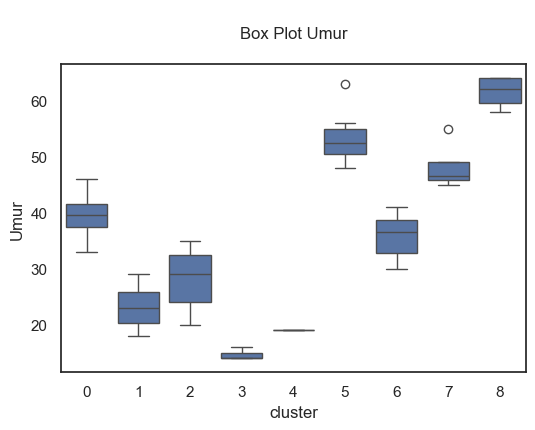

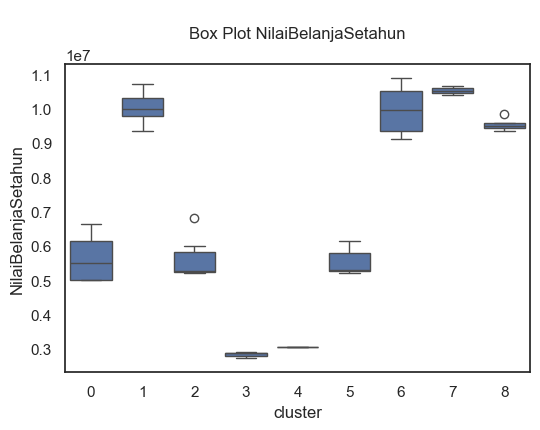

In [14]:
# Visualization of Clustering Results - Box Plot
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster', y = i, data = df_final)  
    plt.title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show()

This chart shows that:
Each cluster has a distinct age range, meaning the grouping successfully differentiates customer segments based on age.
The clusters can be interpreted as follows:

Clusters 3–4 → teenagers or young customers
Clusters 1–2 → young adults
Clusters 5–8 → older adults or senior customers

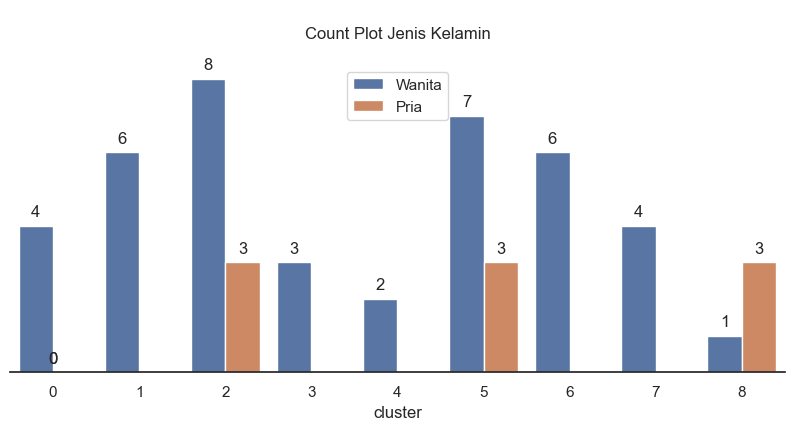

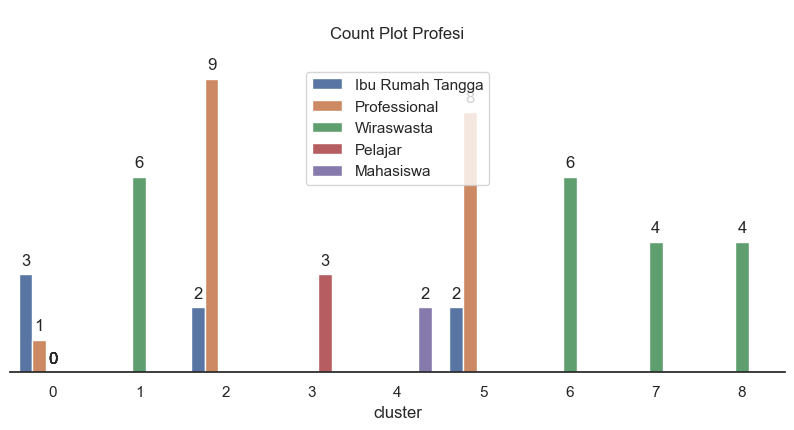

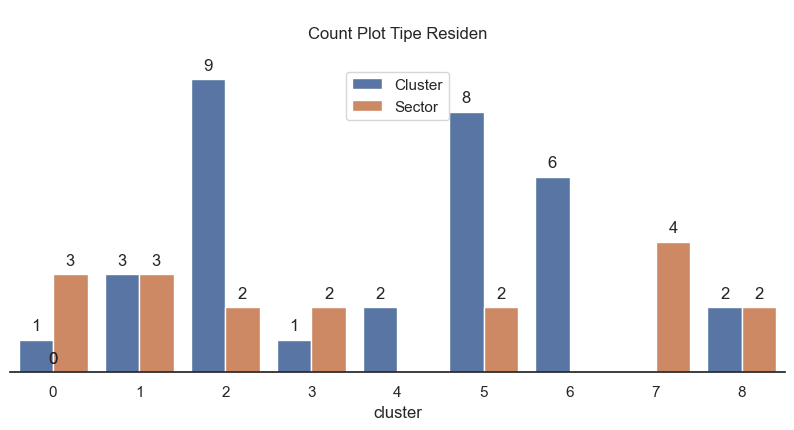

In [15]:
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(10,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()

From the observations made, you can give a segment name for each cluster number, namely:
- Cluster 0: Diamond Young Entrepreneur, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. In addition, the contents of this cluster have an age of around 18 - 41 years with an average of 29 years.

- Cluster 1: Diamond Senior Entrepreneur, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. The contents of this cluster have an age of about 45 - 64 years with an average age of 55 years.

- Cluster 2: Silver Students, the contents of this cluster are students and college students with an average age of 16 years and an annual spending value of close to 3 million.

- Cluster 3: Gold Young Members, the contents of this cluster are young professionals and housewives with an age range of around 20 - 40 years and with an average age of 30 years and a yearly spending value of close to 6 million.

- Cluster 4: Gold Senior Member, the contents of this cluster are professionals and housewives who are old with an age range of 46 - 63 years old and with an average of 53 years old and their annual spending value is close to 6 million.

In [16]:
# Naming the Cluster

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Mapping kolom name  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               26 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

In [17]:
import pandas as pd
# new data 
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Make Data Frame  
new_df = pd.DataFrame(data)  
  
# See the Data  
print(new_df)  


  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


In [18]:
def data_preprocess(data):  
    # Convert Categorical data  
    kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Type gender  
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Type of Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardization Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardization Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardization value column of Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Merging Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


In [19]:
def modelling (data):  
      
    # Calls Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)

[6]


In [20]:
def menamakan_segmen (data_asli, clusters):  
      
    # Merging cluster and data real  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Rename segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen (new_df,clusters)  
  
print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster segmen  
0              8230000        6    NaN  
